# Introduction to Neural Networks 101

### A simple explanation of how they work and how to implement one from scratch in Python

The term “neural network” gets used as a buzzword a lot, but in reality they’re often much simpler than people imagine.

This presentation is intended for complete beginners and assumes ZERO prior knowledge of machine learning

## Building Blocks: Neurons

First, we have to talk about neurons, the basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output. Here’s what a 2-input neuron looks like:

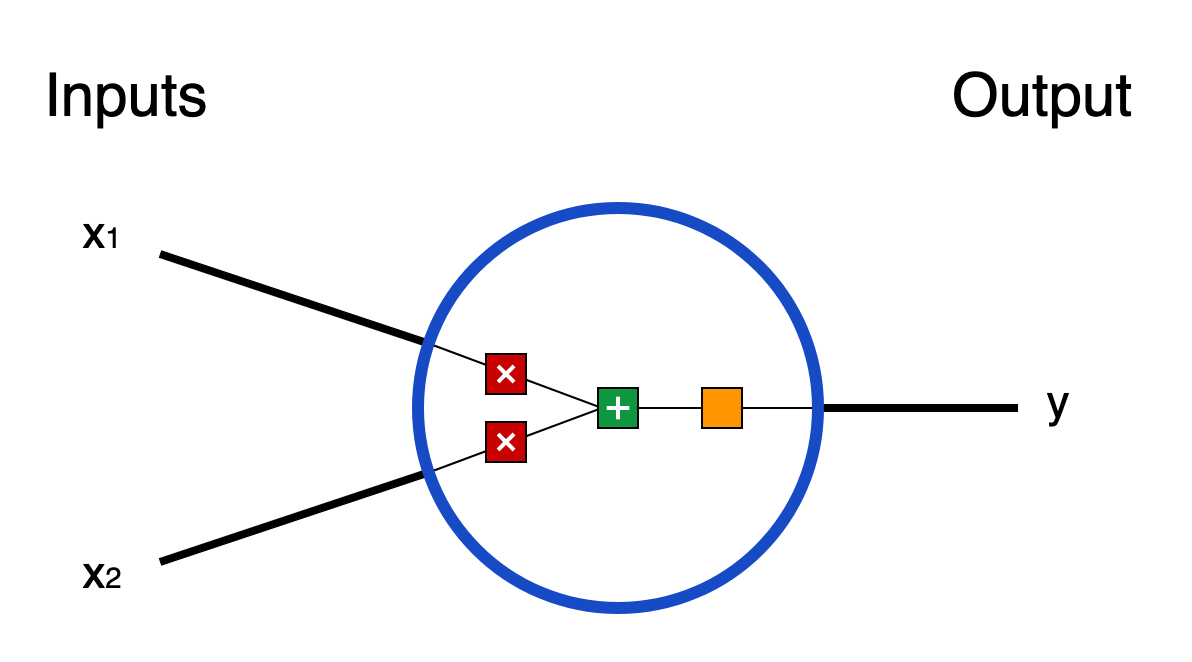

In [1]:
from IPython.display import Image
img_url = 'twoneurons.png'; Embed = Image(img_url);Embed

3 things are happening here. First, in a red square, each input is multiplied by a weight:

\begin{align}
x_1 & \to x_1* w_1\\
x_2 & \to x_2* w_2\\
\end{align}
Next, in a blue square, all the weighted inputs are added together with a bias b:
$$(x_1*w_1)+(x_2*w_2)+b$$
Finally, in the orange square, the sum is passed through an activation function:
$$y=f(x_1*w_1+x_2*w_2+b)$$

The activation function is used to turn an unbounded input into an output that has a nice, predictable form. A commonly used activation function is the sigmoid function:
\begin{equation}
{\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.}
\end{equation}

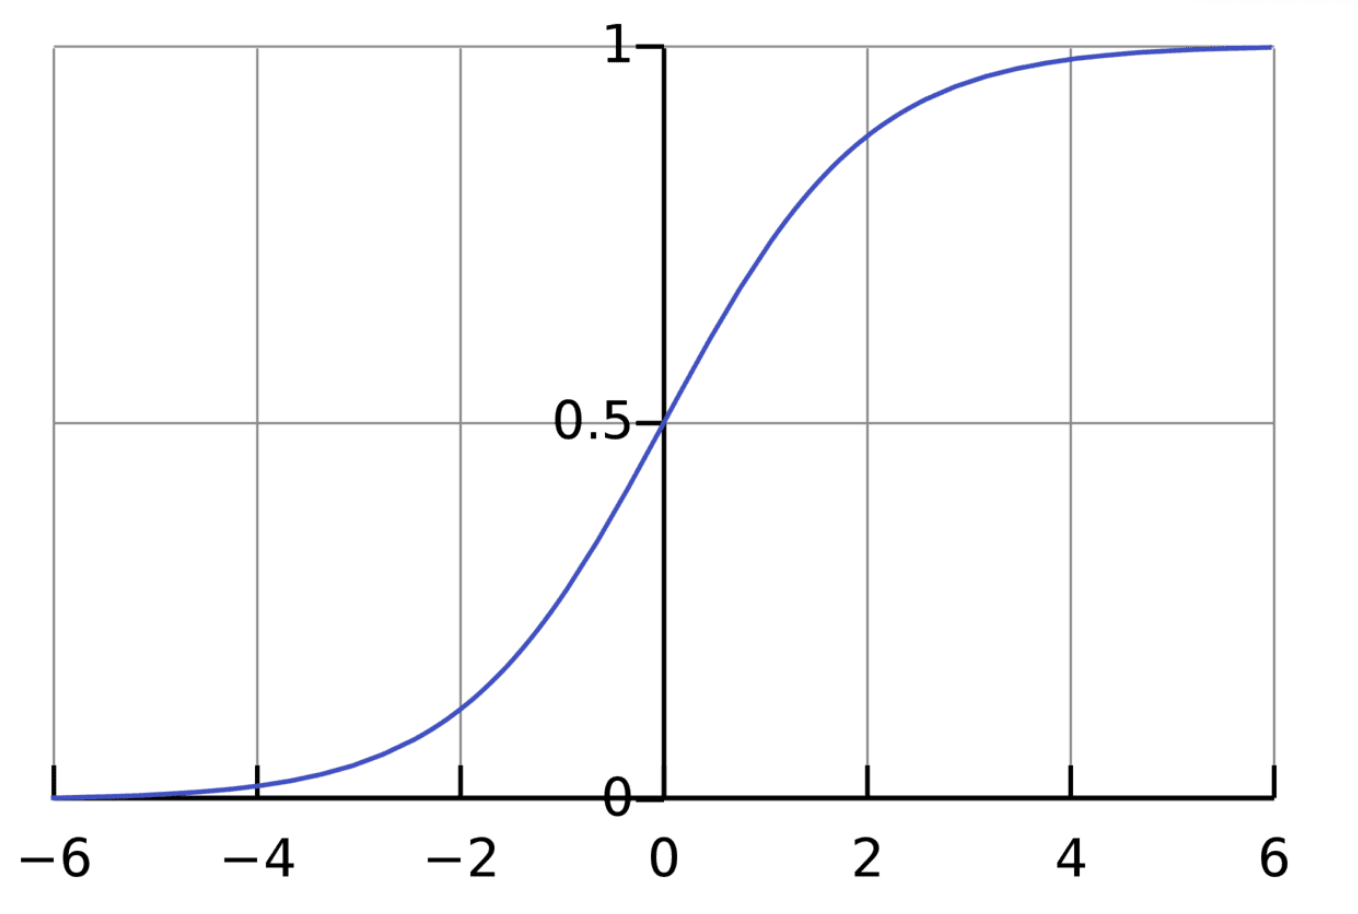

In [2]:
from IPython.display import Image;img_url = 'sigmoid.png';Embed      = Image(img_url);Embed

The sigmoid function only outputs numbers in the range (0,1). You can think of it as compressing $(-\infty, +\infty)$ to $(0,1)$ - big negative numbers become $\sim 0$, and big positive numbers become $\sim 1$

A sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point. A sigmoid "function" and a sigmoid "curve" refer to the same object.

### A Simple Example

Assume we have a 2-input neuron that uses the sigmoid activation function and has the following parameters:
\begin{align}
w &=(0,1) \\
b & = 4\\
\end{align}
where $w_1=0$ and $w_2=1$. 

Now, let’s give the neuron an input of $x=(2,3)$. We’ll use the dot product to write things more concisely:
\begin{align}
(w*x)+b= & ((w_1*x_1)+(w_2*x_2))+b \\
=& 0*2+1*3+4\\
=& 7\\
y=f(w*x+b)=&f(7)=1 / (1 + e^{-7})= 0.999
\end{align}

The neuron outputs 0.999 given the inputs $x=(2,3)$. That’s it! This process of passing inputs forward to get an output is known as feedforward.

### Coding a Neuron

In [3]:
import numpy as np
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        # Weight inputs, add bias, then use the activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


### Combining Neurons into a Neural Network

A neural network is nothing more than a bunch of neurons connected together. Here’s what a simple neural network might look like:

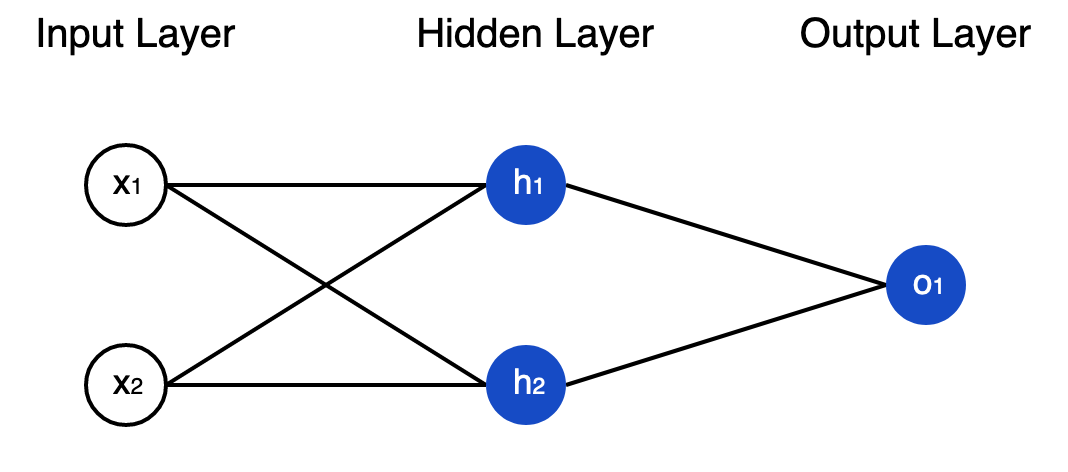

In [4]:
img_url = 'neuralnetwork.png';Embed= Image(img_url);Embed

This network has 2 inputs, a hidden layer with 2 neurons $(h_1$ and $h_2)$, and an output layer with $1$ neuron $(o_1)$. Notice that the inputs for $o_1$ are the outputs from $h_1$and $h_2$- that’s what makes this a network.

A **hidden layer** is any layer between the input (first) layer and output (last) layer. There can be multiple hidden layers!

### An Example: Feedforward

Let’s use the network pictured above and assume all neurons have the same weights $w=(0,1)$, the same bias $b = 0$, and the same sigmoid activation function. Let $h_1, h_2, o_1$ denote the outputs of the neurons they represent.

What happens if we pass in the input $x = (2, 3)$?

\begin{align}
h_1=h_2&=f(w* x+b) \\
&=f((0* 2)+(1* 3)+0)\\
&=f(3)\\
&=1 / (1 + e^{-3})\\
&=0.9526 \\
o_1&=f(w* (h_1,h_2)+b)\\
&=f((0* h_1)+(1* h_2)+0)\\
&=f(0.9526)\\
&=1 / (1 + e^{-0.9526})\\
&=0.7216
\end{align}

The output of the neural network for input $x = (2, 3)$ is 0.7216. Pretty simple, right?

A neural network can have any number of layers with any number of neurons in those layers. The basic idea stays the same: feed the input(s) forward through the neurons in the network to get the output(s) at the end. For simplicity, we’ll keep using the network pictured above for the rest of this topic.

## Coding a Neural Network: Feedforward

In [12]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
#print(n.feedforward(x))    # 0.9990889488055994
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous part
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


## Training a Neural Network, Part 1

Say we have the following measurements:    

| Name          | Weight(lb)    | Height(in) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | 132           |  65        |   F    |
| Bob           | 160           |    72      |      M |
| Charlie       | 152           |     75     |     M  |
| Diana         | 120           |      60    |      F |

Let’s train our network to predict someone’s gender given their weight and height:

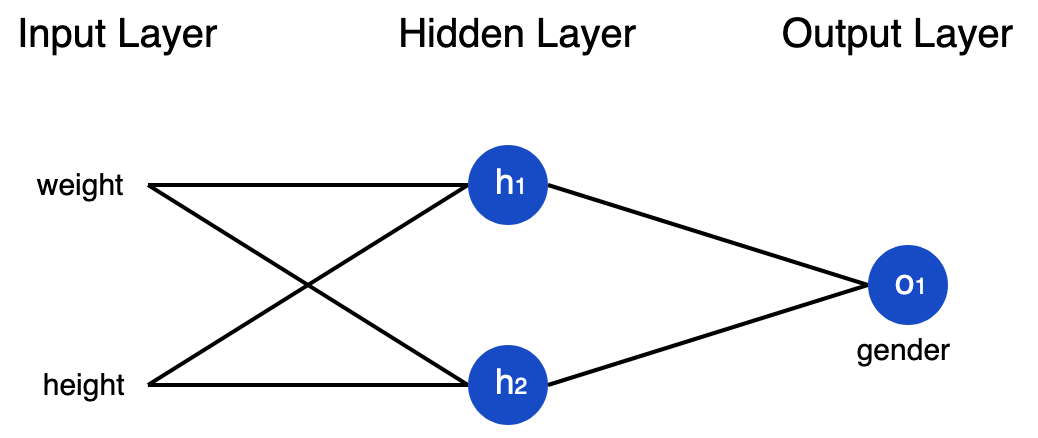

In [6]:
img_url = 'neuralnetworktraining.png';Embed      = Image(img_url);Embed

We’ll represent Male with a 0 and Female with a 1, and we will also shift the data to make it easier to use:

Here, note that $(132+160+152+120)/4=141$ and $(65+72+75+60)/4$=68

#### Loss

Before we train our network, we first need a way to quantify how "good" it's doing so that it can try to do "better". That's what the **loss** is.

We'll use the **mean squared error** (MSE) loss:

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true}-y_{pred})^2$$

Let's break this down:
- $n$ is the number of samples, which is 4.
- $y$ represents the variable being predicted, which is Gender.
- $y_{true}$ is the true value of the variable. For example, $y_{true}$ for Alice would be 1 (Female).
- $y_{pred}$ is the predicted value of the variable. It’s whatever our network outputs.

$(y_{true}-y_{pred})^2$ is known as the squared error. Our loss function is simply taking the average over all squared errors (hence the name mean squared error). The better our predictions are, the lower our loss will be!

***Better predictions = Lower loss***

**Training a network = trying to minimize its loss.**


#### An Example Loss Calculation

Let’s say our network always outputs 0 - in other words, it's confident all humans are Male 🤔. What would our loss be?

Let  diff =   $(y_{true}-y_{pred})^2$

| Name          | $y_{true}$    | $y_{pred}$ | diff|
| --------------|---------------| -------------| ---------------------|
| Alice         | 1             |  0         |  1                     |
| Bob           | 0             |    0       |     0 |
| Charlie       | 0             |     0      |     0  |
| Diana         | 1            |      0      |      1 |


$$ MSE = \frac{1}{4}(1+0+0+1)=0.5 $$

### Code: MSE Loss

In [7]:
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


## Training a Neural Network, Part 2

We now have a clear goal: minimize the loss of the neural network. We know we can change the network's weights and biases to influence its predictions, but how do we do so in a way that decreases loss?

For simplicity, let's pretend we only have Alice in our dataset:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |

Then the mean squared error loss is just Alice’s squared error:

\begin{align}
MSE&=\frac{1}{1}\sum_{i=1}^1(y_{true}−y_{pred})^2\\
&=(y_{true}−y_{pred})^2\\
& =(1−y_{pred})^2
\end{align}

Another way to think about loss is as a function of weights and biases. Let’s label each weight and bias in our network:

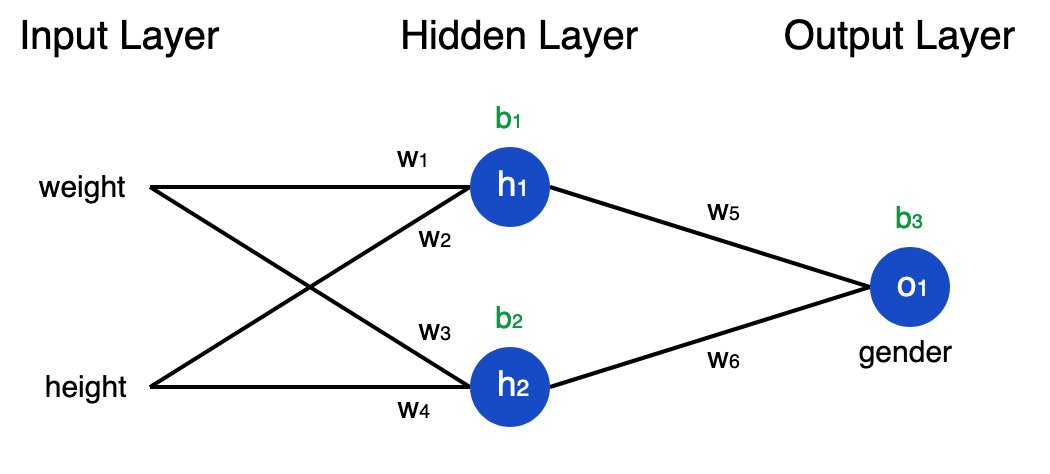

In [8]:
img_url = 'neuralnetworktraning2.png';Embed      = Image(img_url);Embed

Then, we can write loss as a multivariable function:
 $$L(w_1,w_2,w_3,w_4,w_5,w_6,b_1,b_2,b_3)$$

Imagine we wanted to tweak $w_1$. How would loss $L$ change if we changed $w_1$? That's a question the partial derivative $\frac{\partial L}{\partial w_1}$can answer. How do we calculate it?

To start, let's rewrite the partial derivative in terms of $\frac{\partial y_{pred}}{\partial w_1}$ instead:
 $$\dfrac{\partial L}{\partial w_1}= \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial w_1} $$



We can calculate $\frac{\partial L}{\partial y_{pred}}$ because we computed $L = (1 - y_{pred})^2$ above:

$$\dfrac{\partial L}{\partial y_{pred}} = \dfrac{\partial (1 - y_{pred})^2}{\partial y_{pred}}= -2(1-y_{pred})$$

Now, let's figure out what to do with $\frac{\partial y_{pred}}{\partial w_1}$. Just like before, let $h_1, h_2, o_1$ be the outputs of the neurons they represent. Then

$$ y_{pred}=o_1=f(w_5*h_1+w_6*h2+b_3)$$

Since $w_1$ only affects $h_1$ (not $h_2$), we can write


$$\dfrac{\partial y_{pred}}{\partial w_1} =\dfrac{\partial y_{pred}}{\partial h_1} *\dfrac{\partial h_1}{\partial w_1} $$
Also note that by using chain rule,
$$ \dfrac{\partial y_{pred}}{\partial h_1} = w_5*f'(w_5h_1+w_6h_2+b_3)$$
Recall $h_1 = f(w_1x_1+w_2x_2+b_1)$. Thus, we can do the same thing for $\frac{\partial h_1}{\partial w_1}  $:
$$ \dfrac{\partial h_1}{\partial w_1} = x_1*f'(w_1x_1+w_2x_2+b_1)$$
$x_1$ here is weight, and $x_2$ is height. 

This is the second time we've seen $f'(x)$ (the derivate of the sigmoid function) now! Let’s derive it:

$$ f(x) = \dfrac{1}{1+e^{-x}}$$
By taking derivative, we get
$$f'(x)= \dfrac{e^{-x}}{(1 + e^{-x})^2}=f(x) * (1 - f(x))$$




We'll use this nice form for $f'(x)$ later. This form shows we do not need to take a derivative. 

We're done! We've managed to break down $\frac{\partial L}{\partial w_1}$ into several parts we can calculate it now:
$$\dfrac{\partial L}{\partial w_1} = \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial h_1}*\dfrac{\partial h_1}{\partial w_1}  $$

This system of calculating partial derivatives by working backwards is known as backpropagation, or "backprop".

### Example: Calculating the Partial Derivative

We're going to continue pretending only Alice is in our dataset:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |

Let's initialize all the weights to 1 and all the biases to 0. If we do a feedforward pass through the network, we get:
$$ h_1 =f(w_1*x_1+w_2*x_2+b_1)=f(−9+−3+0)=6.16*10^{-6}$$
and similarly
$$h_2 =f(w_3*x_1+w_4*x_2+b_2)=f(−9+−3+0)=6.16*10^{-6} $$
and now let us calculate $o_1$
$$o_1 =f(w_5*h_1+w_6*h_2+b_3)=0.50$$

The network outputs $y_{pred} = 0.50$, which doesn't  favor Male(0) or Female (1). This totally makes sense because we do not do any training yet.

Let's calculate $\frac{\partial L}{\partial w_1}$:
\begin{aligned}
\dfrac{\partial L}{\partial w_1} =& \dfrac{\partial L}{\partial y_{pred}}*\dfrac{\partial y_{pred}}{\partial h_1}*\dfrac{\partial h_1}{\partial w_1}\\
\end{aligned}
Now let us calculate each of the terms on the RHS one by one.
\begin{aligned} 
\dfrac{\partial L}{\partial y_{pred}} &= -2(1 - y_{pred}) \\ 
&= -2(1 - 0.50) \\ &= -1 \\ 
\end{aligned}

and 
\begin{aligned} 
\dfrac{\partial y_{pred}}{\partial h_1} &= w_5 * f'(w_5h_1 + w_6h_2 + b_3) \\ 
&= 1 * f'(6.16* 10^{-6} + 6.16* 10^{-6}+ 0) \\ 
&= f(1.23* 10^{-5}) * (1 - f(1.23* 10^{-5})) \\ 
&= 0.249 \\ 
\end{aligned}
lastly
\begin{aligned} 
\dfrac{\partial h_1}{\partial w_1} &= x_1 * f'(w_1x_1 + w_2x_2 + b_1) \\ 
&= -9 * f'(-9 + -3 + 0) \\ 
&= -9 * f(-12) * (1 - f(-12)) \\ 
&= -5.52* 10^{-5} \\ 
\end{aligned}

Now, we can collect them all and write
\begin{aligned} 
\dfrac{\partial L}{\partial w_1} &= -1 * 0.249 * -5.52* 10^{-5} \\ &= \boxed{1.37* 10^{-5}} \\ 
\end{aligned}

We did it! This tells us that if we were to increase $w_1$, $L$ would increase a tiny bit as a result.

### Training: Stochastic Gradient Descent

We have all the tools we need to train a neural network now! We’ll use an optimization algorithm called stochastic gradient descent (SGD) that tells us how to change our weights and biases to minimize loss. It’s basically just this update equation

$$ w_1\leftarrow w_1-\eta \dfrac{\partial L}{\partial w_1}$$

$\eta$ is a constant called the learning rate that controls how fast we train. 

All we're doing is subtracting $\eta \frac{\partial L}{\partial w_1}$ from $w_1$:

- If $\frac{\partial L}{\partial w_1}$ is positive, $w_1$ will decrease, which makes $L$ decrease.
- If $\frac{\partial L}{\partial w_1}$ is negative, $w_1$ will increase, which makes $L$ increase.

If we do this for every weight and bias in the network, the loss will slowly decrease and our network will improve.

Our training process will look like this:

1. Choose one sample from our dataset. This is what makes it stochastic gradient descent - we only operate on one sample at a time.
2. Calculate all the partial derivatives of loss with respect to weights or biases (e.g. $\frac{\partial L}{\partial w_1}$,$\frac{\partial L}{\partial w_2}$, etc).
3. Use the update equation to update each weight and bias.
4. Go back to step 1.



## Code: A Complete Neural Network

It’s finally time to implement a complete neural network:

| Name          | Weight (minus 141)| Height (minus 68 ) | Gender | 
| ------------- |:-------------:| ---------: | -------|
| Alice         | -9           |  -3        |   1    |
| Bob           | 19           |    4      |      0 |
| Charlie       | 11           |     7    |     0  |
| Diana         | -21           |      -8    |      1 |

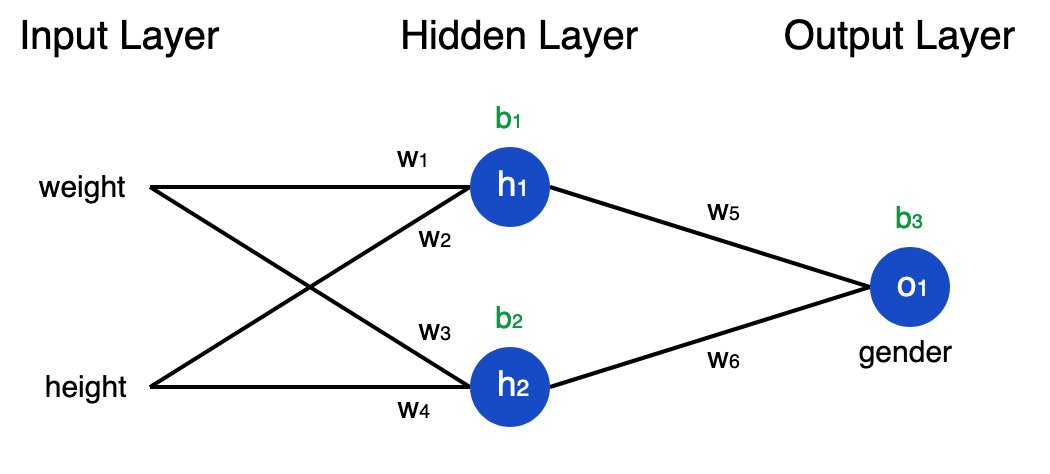

In [9]:
img_url = 'neuralnetworktraning2.png';Embed      = Image(img_url);Embed

In [15]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    for epoch in range(epochs):
        for x, y_true in zip(data, all_y_trues):
            # --- Do a feedforward (we'll need these values later)
            sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
            h1 = sigmoid(sum_h1)

            sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
            h2 = sigmoid(sum_h2)

            sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
            o1 = sigmoid(sum_o1)
            y_pred = o1

            # --- Calculate partial derivatives.
            # --- Naming: d_L_d_w1 represents "partial L / partial w1"
            d_L_d_ypred = -2 * (y_true - y_pred)

            # Neuron o1
            d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
            d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
            d_ypred_d_b3 = deriv_sigmoid(sum_o1)

            d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
            d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

            # Neuron h1
            d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
            d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
            d_h1_d_b1 = deriv_sigmoid(sum_h1)

            # Neuron h2
            d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
            d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
            d_h2_d_b2 = deriv_sigmoid(sum_h2)

            # --- Update weights and biases
            # Neuron h1
            self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
            self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
            self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

            # Neuron h2
            self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
            self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
            self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

            # Neuron o1
            self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
            self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
            self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

          # --- Calculate total loss at the end of each epoch
        
   
        if epoch % 10 == 0:
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = mse_loss(all_y_trues, y_preds)
            
            print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-9, -3],  # Alice
  [19, 4],   # Bob
  [11, 7],   # Charlie
  [-21, -8], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)


Epoch 0 loss: 0.251
Epoch 10 loss: 0.069
Epoch 20 loss: 0.043
Epoch 30 loss: 0.035
Epoch 40 loss: 0.030
Epoch 50 loss: 0.027
Epoch 60 loss: 0.024
Epoch 70 loss: 0.022
Epoch 80 loss: 0.020
Epoch 90 loss: 0.019
Epoch 100 loss: 0.018
Epoch 110 loss: 0.016
Epoch 120 loss: 0.015
Epoch 130 loss: 0.014
Epoch 140 loss: 0.014
Epoch 150 loss: 0.013
Epoch 160 loss: 0.012
Epoch 170 loss: 0.012
Epoch 180 loss: 0.011
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.009
Epoch 230 loss: 0.009
Epoch 240 loss: 0.009
Epoch 250 loss: 0.008
Epoch 260 loss: 0.008
Epoch 270 loss: 0.008
Epoch 280 loss: 0.007
Epoch 290 loss: 0.007
Epoch 300 loss: 0.007
Epoch 310 loss: 0.007
Epoch 320 loss: 0.007
Epoch 330 loss: 0.006
Epoch 340 loss: 0.006
Epoch 350 loss: 0.006
Epoch 360 loss: 0.006
Epoch 370 loss: 0.006
Epoch 380 loss: 0.006
Epoch 390 loss: 0.005
Epoch 400 loss: 0.005
Epoch 410 loss: 0.005
Epoch 420 loss: 0.005
Epoch 430 loss: 0.005
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

In [16]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.963
Frank: 0.061


## References

1. https://victorzhou.com/blog/intro-to-neural-networks/#example-calculating-the-partial-derivative